# Safeframe AI Evaluation

Contains sample user queries and code generated from Safeframe AI for multiple datasets

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
filepath = r"/kaggle/input/electric-power-consumption-data-set/household_power_consumption.txt"

In [4]:
df = pd.read_csv(
    filepath,
    sep=';',
    parse_dates={'datetime': ['Date', 'Time']},
    infer_datetime_format=True,
    na_values=['?'],
    low_memory=False
)
df = df.dropna()
df['Global_active_power'] = df['Global_active_power'].astype(float)
df = df.set_index('datetime')

/tmp/ipykernel_35/3408045592.py:1: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df = pd.read_csv(
/tmp/ipykernel_35/3408045592.py:1: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df = pd.read_csv(
/tmp/ipykernel_35/3408045592.py:1: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df = pd.read_csv(


In [5]:
df.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
datetime,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


User Query: What was the average active power consumption in March 2007?

In [6]:
df.loc['2007-03', 'Global_active_power'].mean()

1.318627030175407

User Query: What hour of the day had the highest power usage on Christmas 2006?

In [7]:
df.loc['2006-12-25'].groupby(df.loc['2006-12-25'].index.hour)['Global_active_power'].sum().idxmax()

22

User Query: Compare energy usage (Global_active_power) on weekdays vs weekends.

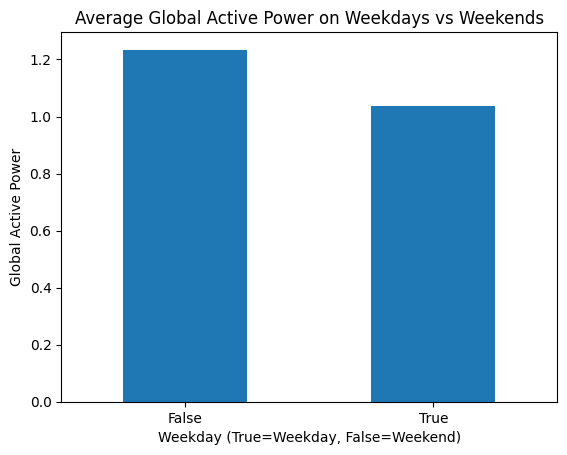

In [8]:
# compare active power on weekdays vs weekends
df.groupby(df.index.dayofweek < 5)['Global_active_power'].mean().plot(kind='bar') # plot average active power by weekday
plt.title('Average Global Active Power on Weekdays vs Weekends') # add title
plt.xlabel('Weekday (True=Weekday, False=Weekend)') # add x label
plt.ylabel('Global Active Power') # add y label
plt.xticks(rotation=0) # rotate x ticks
plt.show() # show plot

User Query: Find days where energy consumption exceeded 5 kWh.

In [9]:
(df['Global_active_power'].resample('D').sum() > 5).index[df['Global_active_power'].resample('D').sum() > 5].date

array([datetime.date(2006, 12, 16), datetime.date(2006, 12, 17),
       datetime.date(2006, 12, 18), ..., datetime.date(2010, 11, 24),
       datetime.date(2010, 11, 25), datetime.date(2010, 11, 26)],
      dtype=object)

User Query: Plot the energy usage trend for the first week of January 2007. 

<Axes: xlabel='datetime'>

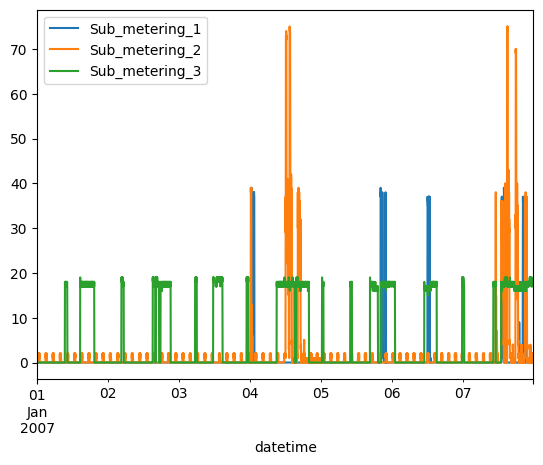

In [10]:
df.loc['2007-01-01':'2007-01-07', ['Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']].plot()

User Query: Find the average voltage for each day of the first week of February 2007.

In [11]:
df.loc['2007-02-01':'2007-02-07', 'Voltage'].resample('D').mean()

datetime
2007-02-01    240.392139
2007-02-02    240.334389
2007-02-03    238.910194
2007-02-04    239.633333
2007-02-05    240.810312
2007-02-06    241.264160
2007-02-07    241.149694
Freq: D, Name: Voltage, dtype: float64

User Query: What is the correlation between global active power and sub-metering values?

In [ ]:
df[['Global_active_power', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']].corr()